<h1>Image Correction Tests</h1>
<p>- Here we will use the master flats and biases to calibrate images.</p>

In [1]:
'''
load images the same way as did last time
'''

import os
import collections 
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

#user specific path...
directory = '/Users/spencerfreeman/Desktop/stepUp/skuban-freeman2024-07-8'
#this linked list stores float arrays of each image, these can be manipulated.


light_frame_indicator = "lrp"
flat_frame_indicator = "mflat.fit"
bias_frame_indicator = "mbias.fit"

'''
if it turns out we need more information from the fits images, then the file objects must be adjusted in these methods.
'''
#helper method
def print_guidance(name_indicator, directory):
    print("---------------------------------------------------------------------------------------------------------------------------------------------")
    print("loading images from {0} including the string {1}...".format(directory, name_indicator))
    print("---------------------------------------------------------------------------------------------------------------------------------------------")

#running method
def load_light_frames(directory, light_frame_indicator):
    light_frame_linkedlist = collections.deque()
    print_guidance(light_frame_indicator, directory)
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and light_frame_indicator in filename:
            file = fits.open(f)
            light_frame_linkedlist.append(file[0].data)
    return light_frame_linkedlist

def load_bias_frames(directory, bias_frame_indicator):
    print_guidance(bias_frame_indicator, directory)
    bias_frame_linkedlist = collections.deque()
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and bias_frame_indicator in filename:
            file = fits.open(f)
            bias_frame_linkedlist.append(file[0].data)
    return bias_frame_linkedlist

def load_flat_frames(directory, flat_frame_indicator):
    print_guidance(flat_frame_indicator, directory)
    flat_frame_linkedlist = collections.deque()
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and flat_frame_indicator in filename:
            file = fits.open(f)
            flat_frame_linkedlist.append(file[0].data)
    return flat_frame_linkedlist

#linked list storing lights wil now be stored in l
lights = load_light_frames(directory, light_frame_indicator)
flats = load_flat_frames(directory, flat_frame_indicator)
biases = load_bias_frames(directory, bias_frame_indicator)

print('total lights loaded: {0}'.format(len(lights)))
print('total flats loaded: {0}'.format(len(flats)))
print('total biases loaded: {0}'.format(len(biases)))
#plt.imshow(fits.open(os.path.join(directory, "mflat.fit"))[0].data)
# plt.imshow(lights[0])
# plt.imshow(flats[0])
 

---------------------------------------------------------------------------------------------------------------------------------------------
loading images from /Users/spencerfreeman/Desktop/stepUp/skuban-freeman2024-07-8 including the string lrp...
---------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------
loading images from /Users/spencerfreeman/Desktop/stepUp/skuban-freeman2024-07-8 including the string mflat.fit...
---------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------
loading images from /Users/spencerfreeman/Desktop/stepUp/skuban-fr

In [37]:
'''
return our array dimensions for resizing purposes...
'''
def return_dimensions(pixel_2d_array):
    return ([len(pixel_2d_array), len(pixel_2d_array[0])])

return_dimensions(flats[0])

[4096, 4096]

4096


array([[0.95492005, 0.9566742 , 0.95517564, ..., 0.9493251 , 0.95174515,
        0.942598  ],
       [0.95858014, 0.9633403 , 0.94877166, ..., 0.9501952 , 0.9479724 ,
        0.94133544],
       [0.9537617 , 0.9534978 , 0.9540235 , ..., 0.9490384 , 0.9431175 ,
        0.94371533],
       ...,
       [0.9423615 , 0.9430293 , 0.9372156 , ..., 0.95103943, 0.9409064 ,
        0.9359767 ],
       [0.9301432 , 0.92688274, 0.91313744, ..., 0.9248579 , 0.9219906 ,
        0.92051744],
       [0.04427115, 0.046459  , 0.04767657, ..., 0.03242739, 0.03001187,
        0.02601447]], dtype='>f4')

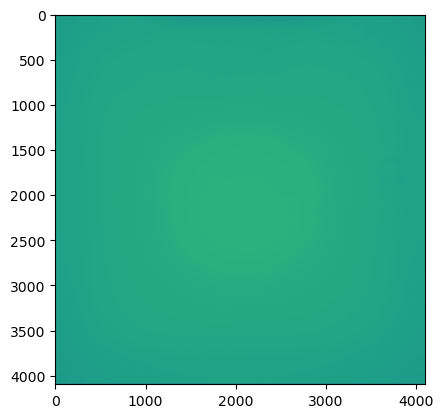

In [45]:
'''
Here we will take the average of across the flats and bias images to obtain master flats and biases.
If we only have one flat and/or bias loaded, we can skip this step.
'''
def average_flats(flats):
    
    dimensions = return_dimensions(flats[0])
    print(dimensions[1])
    master_flat = [[0]*dimensions[1]]*dimensions[0]
    
    if(len(flats) == 0):
        print("image load failure, please check path and retry.")
        return
    #case in which only one flat is present
    elif(len(flats) == 1):
        master_flat = flats[0]
        plt.imshow(master_flat)
        return master_flat
    elif(len(flats)>1):
        for pixel_array in flats:
            for i in range(0,dimensions[0]):
                for j in range(0, dimensions[1]):
                    #populate the master flat array with the average pixel values across all flats.
                    master_flat[i][j] += pixel_array[i][j]/len(flats)
        return master_flat 
    plt.imshow(master_flat)
    
    def average_biases(biases):
        return
        
                    
average_flats(flats)     

            
    
    